<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Duffing_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This work implements Arnold Cat encryption for the image. The original image with key and the encrypted image is fed to a Neural Network. Once the image is encrypted, the encrypted and decryted image is fed to the neural network.
The decryption of the image is successful only when authorized key is used, otherwise the original image cannot be obtained.

We are using 2 types of images for Arnold Cat Encryption.
1. HorizonZero.png which is a colored image
2. lena.bmp which is a grayscale image

HorizonZero.png image is of size 250 pixels in width and 250 pixels in height and has 3 channels which corresponds to RGB format


lena.bmp is of size 512 pixels in width and height.


In [ ]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png



--2022-05-23 07:51:53--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 142.251.6.139, 142.251.6.113, 142.251.6.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7id80tkmmpbmj07idd4c9e8roh9a0gq/1653292275000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm [following]
--2022-05-23 07:51:54--  https://doc-08-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7id80tkmmpbmj07idd4c9e8roh9a0gq/1653292275000/05356688754188258246/*/1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-08-40-docs.googleusercontent.com (doc-08-40-docs.googleusercontent.com)|172.217.212.132|:

The input image is converted into a matrix using the pixels. The size of the image with width and height is entered into the matrix and each and every value of the pixel is the data inside the matrix. The intensity of the pixels varies from 0 to 255.

The below lines of code provides the function to get image matrix from pixel access object.

The following script loads an image, accesses one pixel from it, then changes it in terms of width and height


In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [ ]:
im = Image.open("HorizonZero.png")  # Can be many different formats.
pix = im.load()
m= im.size[0]

In [ ]:
x1=-0.04
y1=0.2

savex1=[]
savey1=[]


for i in range(m*m*8):
        #Henon Map formula
    xN = y1
    yN = -0.2*x1 + 2.75*y1 - (y1*y1*y1)


        # New x = xN and y = yN
    x1 = xN
    y1 = yN

    savex1.append(x1)
    savey1.append(y1)

In [ ]:


x2=0.23
y2=-0.13

savex2=[]
savey2=[]


for i in range(m*m*8):
        #Henon Map formula
    xN = y2
    yN = -0.2*x2 + 2.75*y2 - (y2*y2*y2)


        # New x = xN and y = yN
    x2 = xN
    y2 = yN

    savex2.append(x2)
    savey2.append(y2)




In [ ]:


#FINAL X and Y
h1=[]

for i in range(m*m*8):
    if(savex2[i]>savex1[i]):
        h1.append(1)
    else:
        h1.append(0)

h2=[]

for i in range(m*m*8):
    if(savey2[i]<savey1[i]):
        h2.append(1)
    else:
        h2.append(0)


len(h2)



500000

In [ ]:
#XORing the secret images generated:

def returningbinarytuples(p):
    binary=[]
    for i in range(8):
        binary.append(int(p%2))
        p=(p-(p%2))/2

    binaryreal=[0,0,0,0,0,0,0,0]

    for i in range(8):
        binaryreal[7-i]=binary[i]
    return binaryreal

def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + bit
    return decimal

In [ ]:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]

img2=image_matrix

In [ ]:
#RED PLANE

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][0])
        for k in range (8):
            imagebitwise.append(queen[k])

r=[]

for i in range (m*m*8):
    r.append(imagebitwise[i]^h1[i]^h2[i])
len(r)


# GREEN PLANE X
imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])

g=[]

for i in range (m*m*8):
    g.append(imagebitwise[i]^h1[i]^h2[i])
len(g)


#BLUE PLANE X

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(img2[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])

b=[]

for i in range (m*m*8):
    b.append(imagebitwise[i]^h1[i]^h2[i])

len(b)

500000

In [ ]:
r=np.reshape(r,(m*m,8))
g=np.reshape(g,(m*m,8))
b=np.reshape(b,(m*m,8))

In [ ]:
encrypted1=[]
encryprow=[]
for i in range(1,(m*m)+1):
    try:
        r1=dec(r[i-1])
        g1=dec(g[i-1])
        b1=dec(b[i-1])
        encryprow.append((r1,g1,b1))
        if(i%m==0):
            encrypted1.append(encryprow)
            encryprow=[]

    except:
       ;

In [ ]:
im5 = Image.new("L", (m, m))
rgb_im = im5.convert('RGBA')
pix = rgb_im.load()

for x in range(m):
    for y in range(m):
        pix[x, y] = img2[x][y]
rgb_im.save("duffingencrypted1.bmp", "BMP")

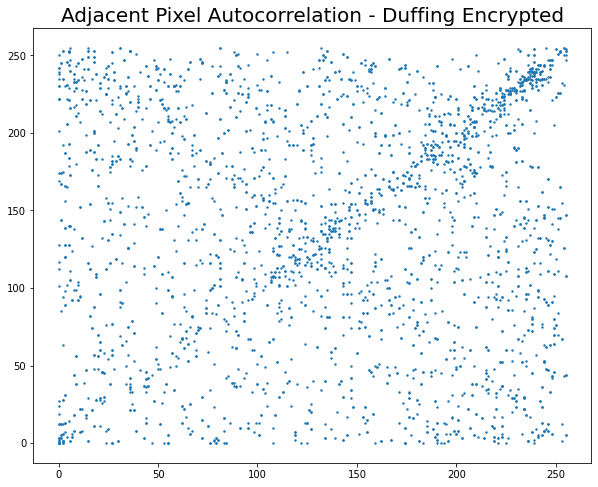

In [ ]:
samples_x = []
samples_y = []
for i in range(1024):
    x = random.randint(0,m-2)
    y = random.randint(0,m-1)
    samples_x.append(encrypted1[x][y])
    samples_y.append(encrypted1[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Duffing Encrypted', fontsize=20)
plt.show()

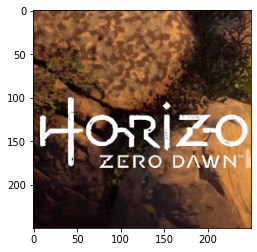

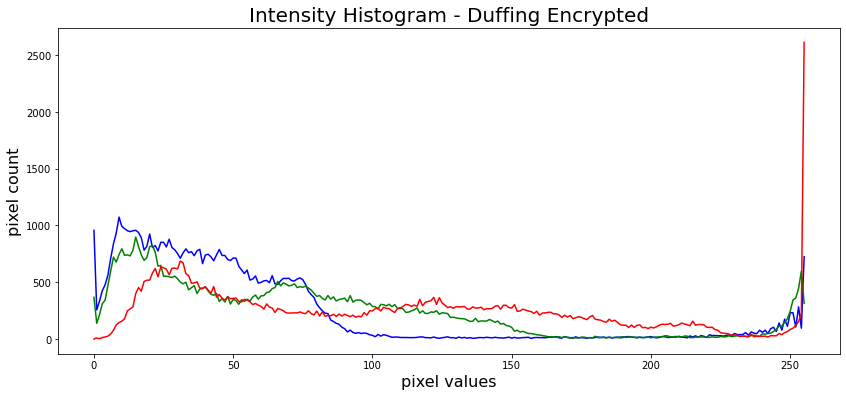

In [ ]:
img = cv2.imread("duffingencrypted1.bmp",1)
pil_im = Image.open("duffingencrypted1.bmp", 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Duffing Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

In [ ]:


#DECRYPTION PROCESS:

#2-D Duffing map



im = Image.open("duffingencrypted1.bmp")  # Can be many different formats.
pix = im.load()
m= im.size[0]



In [ ]:
im.size

(250, 250)

In [ ]:
image_matrix = []
for width in range(m):
    row = []
    for height in range(m):
        try:
            row.append((pix[width,height]))
        except:
            row=[pix[width, height]]
    try:
        image_matrix.append(row)
    except:
        image_matrix = [row]

In [ ]:
#RED PLANE

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][0])
        for k in range (8):
            imagebitwise.append(queen[k])

r=[]

for i in range (m*m*8):
    r.append(imagebitwise[i]^h1[i]^h2[i])
len(r)


# GREEN PLANE X
imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])

g=[]

for i in range (m*m*8):
    g.append(imagebitwise[i]^h1[i]^h2[i])
len(g)


#BLUE PLANE X

imagebitwise=[]

for i in range(m):
    for j in range(m):
        queen=returningbinarytuples(image_matrix[i][j][1])
        for k in range (8):
            imagebitwise.append(queen[k])

b=[]

for i in range (m*m*8):
    b.append(imagebitwise[i]^h1[i]^h2[i])

len(b)

500000

In [ ]:
r=np.reshape(r,(m*m,8))
g=np.reshape(g,(m*m,8))
b=np.reshape(b,(m*m,8))

decrypted1=[]
decryprow=[]
for i in range(1,(m*m)+1):
    try:
        r1=dec(r[i-1])
        g1=dec(g[i-1])
        b1=dec(b[i-1])
        decryprow.append((r1,g1,b1))
        if(i%m==0):
            decrypted1.append(decryprow)
            decryprow=[]

    except:
       ;

In [ ]:


im5 = Image.new("L", (m, m))
rgb_im = im5.convert('RGBA')
pix = rgb_im.load()

for x in range(m):
    for y in range(m):
        pix[x, y] = img2[x][y]
rgb_im.save("duffingdecrypted1.bmp", "BMP")



In [ ]:
im5.size

(250, 250)

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
encrypted1

[[(166, 203, 203),
  (162, 207, 207),
  (153, 195, 195),
  (151, 193, 193),
  (154, 199, 199),
  (160, 205, 205),
  (158, 202, 202),
  (154, 198, 198),
  (146, 192, 192),
  (138, 185, 185),
  (135, 184, 184),
  (129, 179, 179),
  (106, 159, 159),
  (95, 137, 137),
  (92, 150, 150),
  (30, 230, 230),
  (199, 13, 13),
  (217, 1, 1),
  (164, 106, 106),
  (129, 80, 80),
  (132, 85, 85),
  (47, 0, 0),
  (2, 211, 211),
  (198, 21, 21),
  (132, 178, 178),
  (142, 188, 188),
  (153, 198, 198),
  (151, 196, 196),
  (157, 202, 202),
  (170, 213, 213),
  (175, 218, 218),
  (175, 216, 216),
  (172, 213, 213),
  (170, 211, 211),
  (169, 208, 208),
  (166, 204, 204),
  (167, 205, 205),
  (176, 214, 214),
  (185, 223, 223),
  (185, 222, 222),
  (180, 217, 217),
  (176, 213, 213),
  (175, 214, 214),
  (173, 211, 211),
  (159, 200, 200),
  (150, 191, 191),
  (150, 192, 192),
  (149, 193, 193),
  (148, 194, 194),
  (153, 198, 198),
  (177, 216, 216),
  (190, 224, 224),
  (206, 234, 234),
  (219, 242, 24

In [ ]:
decrypted1

[[(166, 203, 203),
  (162, 207, 207),
  (153, 195, 195),
  (151, 193, 193),
  (154, 199, 199),
  (160, 205, 205),
  (158, 202, 202),
  (154, 198, 198),
  (146, 192, 192),
  (138, 185, 185),
  (135, 184, 184),
  (129, 179, 179),
  (106, 159, 159),
  (95, 137, 137),
  (92, 150, 150),
  (30, 230, 230),
  (199, 13, 13),
  (217, 1, 1),
  (164, 106, 106),
  (129, 80, 80),
  (132, 85, 85),
  (47, 0, 0),
  (2, 211, 211),
  (198, 21, 21),
  (132, 178, 178),
  (142, 188, 188),
  (153, 198, 198),
  (151, 196, 196),
  (157, 202, 202),
  (170, 213, 213),
  (175, 218, 218),
  (175, 216, 216),
  (172, 213, 213),
  (170, 211, 211),
  (169, 208, 208),
  (166, 204, 204),
  (167, 205, 205),
  (176, 214, 214),
  (185, 223, 223),
  (185, 222, 222),
  (180, 217, 217),
  (176, 213, 213),
  (175, 214, 214),
  (173, 211, 211),
  (159, 200, 200),
  (150, 191, 191),
  (150, 192, 192),
  (149, 193, 193),
  (148, 194, 194),
  (153, 198, 198),
  (177, 216, 216),
  (190, 224, 224),
  (206, 234, 234),
  (219, 242, 24